# Data preparation
### Received csv files - all fields have object datatype & 1 Excell file with explanation of the data field names
The Goal is to clean data and change data types to categorical, float or int, so that it can be easily loaded in Tableau.</br>
For ML Engineer, joining of the tables is more appropriate, one can have overview of the data in 1 table.</br>
</br>Import the necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import the Excell file and view data

In [7]:
excelfile = pd.read_excel(open('Data/Data_dictionary.xlsx', 'rb'), sheet_name='Sheet1')

check all definitions of fields in 1 place

In [8]:
group = excelfile.groupby(['Sheet', 'Field'])[ 'Definition']
group.head()

0                                    ID of the category
1                                  Name of the category
2                                     ID of the country
3                                  Name of the industry
4                          Year of published data: 2022
5                               Name of the subcategory
6     Place of the subcategory in the subcategory hi...
7                               "Off-trade Volume" only
8     Name of the distribution channel, how the fina...
9     Place of the outlet in the outlet hierarchy (1...
10    In thousands or millions of litres for the Volume
11                               Year of the sale: YYYY
12                         Year formatted as 31/12/YYYY
13                                     Number of [Unit]
14                                 Name of the category
15                                    ID of the country
16                                 Name of the industry
17                                ID of the Subc

Csv files are stored in folder 'Data', the name of the file and separator may be different

In [9]:
Locations = pd.read_csv('Data/Locations.csv', sep=';')
Locations.head()

,id,0,1,0.1,2,0.2,3,0.3,4,0.4,5,0.5,6,0.6,7,0.7,8,0.8
0,Region,NaN,Asia Pacific,NaN,Australasia,NaN,Eastern Europe,NaN,Latin America,NaN,Middle East and Africa,NaN,North America,NaN,Western Europe,NaN,World,NaN
1,Country,NaN,Asia Pacific,NaN,Australasia,NaN,Eastern Europe,NaN,Latin America,NaN,Middle East and Africa,NaN,North America,NaN,Western Europe,NaN,World,NaN


The datafile of 'Locations' needs different manipulations of the data, we transpose and clean the empty fields

In [16]:
Locations = pd.read_csv('Data/Locations.csv', sep=';')

Locations = Locations.T

Locations.dropna(inplace=True)
Locations.reindex()
Locations.columns = Locations.iloc[0]
Locations = Locations.iloc[1:]
df.to_csv('Location.csv', index=False)
df = DataFrame(Locations, columns=[ 'Region', 'Country'])

print(Locations.columns)
df['Location'] = df.reset_index().index
df.set_index('Location')
df['Region']


Index(['Region', 'Country'], dtype='object', name='id')


1              Asia Pacific
2               Australasia
3            Eastern Europe
4             Latin America
5    Middle East and Africa
6             North America
7            Western Europe
8                     World
Name: Region, dtype: object

In [7]:
type(df['Region'])
df['Region'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='Location')

join the 2 DataFrames together

In [8]:
Channel_Volume = pd.read_csv('Data/Channel_Volume.csv')
Channel_Volume['Location'] = Channel_Volume['Location'].rename('id').astype(int)

Channel_Volume = Channel_Volume.join(df['Region'],on='Location')

Channel_Volume.drop('Location', axis=1, inplace=True)
Channel_Volume.rename(columns={"Region": "Location"}, inplace=True)

Channel_Volume.head()

,Industry,Edition,Category,Subcategory,Hierarchy_Level,Data_Type,Outlet,Outlet_Hierarchy,Unit,Year_text,Year_date,Volume,Location
0,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2007,"Monday, 31 December 2007","2613,845506",Australasia
1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2008,"Wednesday, 31 December 2008","2513,025824",Australasia
2,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2009,"Thursday, 31 December 2009","2421,088595",Australasia
3,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2010,"Friday, 31 December 2010","2422,128432",Australasia
4,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2011,"Saturday, 31 December 2011","2439,33622",Australasia


change the 'volume' datatype to float

In [9]:
Channel_Volume['Volume'] = Channel_Volume['Volume'].str.replace(',', '.')
Channel_Volume['Volume'] = Channel_Volume['Volume'].astype('float')
Channel_Volume['Volume']

0        2613.845506
1        2513.025824
2        2421.088595
3        2422.128432
4        2439.336220
            ...     
8463    16514.210840
8464    16522.152390
8465    16544.606440
8466    16626.514900
8467    16664.638000
Name: Volume, Length: 8468, dtype: float64

Read to view 'Market Sizes' file

In [10]:
Market_Sizes = pd.read_csv('Data/Market_Sizes.csv', sep=',')

The csv file 'Company_Share_GBO_unit' can't be loaded at first. In VSCode one needs to open the file, select the multiple ';;;;;' signs and right-click to select 'Change all occurences' and delete all. After that the file can be loaded. 

In [11]:
Company_Share_GBO_unit = pd.read_csv('Data/Company_Share_GBO_unit.csv', sep=';')
Company_Share_GBO_unit.head()

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
0,8.0,Alcoholic Drinks,13.0,1.0,Total Volume,Anheuser-Busch InBev NV,million litres,2016.0,31-12-16,4.0,"35506,3773"
1,8.0,Alcoholic Drinks,13.0,1.0,Total Volume,Heineken NV,million litres,2016.0,"Saturday, 31 Dec 2016",4.0,"18482,595"
2,8.0,Alcoholic Drinks,13.0,1.0,Total Volume,Carlsberg A/S,million litres,2016.0,31-12-16,4.0,"11121,6986"
3,8.0,Alcoholic Drinks,13.0,1.0,Total Volume,Dragonyte Brewery,million litres,2016.0,31-Dec-16,4.0,"6252,3825"
4,8.0,Alcoholic Drinks,13.0,1.0,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016.0,31 12 2016,4.0,"7834,49490"


In [12]:
Company_Share_GBO_unit.dtypes

Location              float64
Industry               object
Subcategory_ID        float64
Hierarchy_Level       float64
Data_Type              object
Global_Brand_Owner     object
Unit                   object
Year_text             float64
Year_date              object
Year_minus_2016       float64
Volume                 object
dtype: object

In the same way like with the table Locations, one can see that 'Location' is float and not int. Volume needs in the same way to be converted to float from object


### Conclusion </br> The other csv files can also be loaded in a similar manner and joined to be explored further.

In [16]:
# subset the Channel_Volume DataFrame
df2  = Channel_Volume[Channel_Volume['Unit'] == 'million litres']
df3  = Channel_Volume[(Channel_Volume['Unit'] == '000 litres') & (Channel_Volume['Volume'] < 23.9)& (Channel_Volume['Volume'] >13.9)]


Even after subsetting for 'Volume' > 24 liters, we don't have even distribution.
A sample of the resulting DataFrame is taken, only 40 samples with 40 as the number of bins
</br> Histogram of the volume column in file 'Channel_Volume':

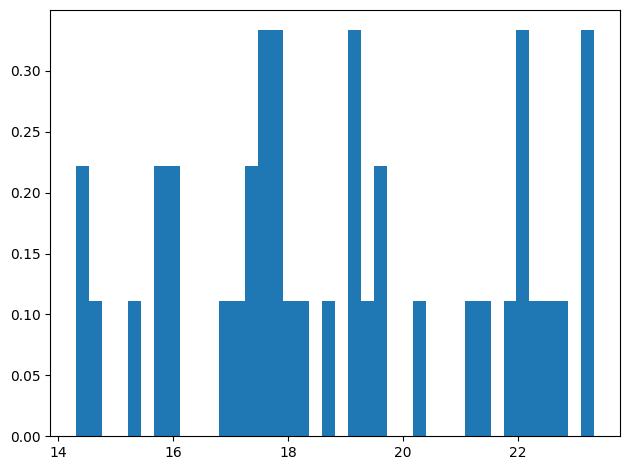

In [17]:
fig, ax = plt.subplots()
# plot only the 'Volume' column
ax.hist(df3['Volume'].sample(40), 40, density=True)
fig.tight_layout()
plt.show();